In [1]:
from GasDynamicsSim import ShockSim

C:\Users\Jackie Zheng\PycharmProjects\StanShock\stanShock.py:393: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getCp_python" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(int64, dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload of function 'zeros': File: numba\core\typing\npydecl.py: Line 507.
    With argument(s): '(int64, dtype=Function(<class 'int'>))':
   No match.

During: resolving callee type: Function(<built-in function zeros>)
During: typing of call at C:\Users\Jackie Zheng\PycharmProjects\StanShock\stanShock.py (416)


File "..\stanShock.py", line 416:
def getCp_python(T,Y,TTable,a,b):
    <source elided>
    #determine the indices
    indices = np.zeros(nX,dtype=int)
    ^

  def getCp_python(T,Y,TTable,a,b):
C:\Users\Jackie Zheng\PycharmProjects\StanShock\stanShock.py

Iteration: 100. Current time: 0.000597. Final time: 0.013000. Time step: 5.859280e-06.
Iteration: 200. Current time: 0.001179. Final time: 0.013000. Time step: 5.784189e-06.
Iteration: 300. Current time: 0.001755. Final time: 0.013000. Time step: 5.724309e-06.
Iteration: 400. Current time: 0.002324. Final time: 0.013000. Time step: 5.671735e-06.
Iteration: 500. Current time: 0.002889. Final time: 0.013000. Time step: 5.615617e-06.
Iteration: 600. Current time: 0.003447. Final time: 0.013000. Time step: 5.557140e-06.
Iteration: 700. Current time: 0.004000. Final time: 0.013000. Time step: 5.496431e-06.
Iteration: 800. Current time: 0.004547. Final time: 0.013000. Time step: 5.437488e-06.
Iteration: 900. Current time: 0.005088. Final time: 0.013000. Time step: 5.381042e-06.
Iteration: 1000. Current time: 0.005623. Final time: 0.013000. Time step: 5.327767e-06.
Iteration: 1100. Current time: 0.006153. Final time: 0.013000. Time step: 5.277898e-06.
Iteration: 1200. Current time: 0.006679. 

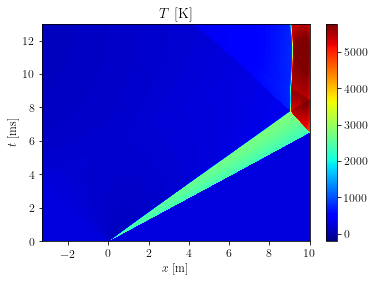

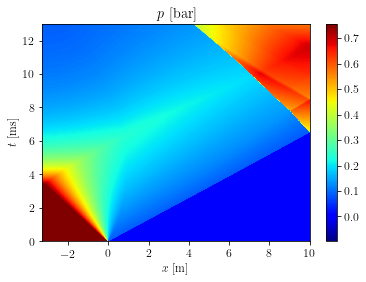

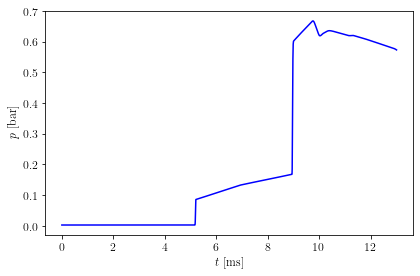

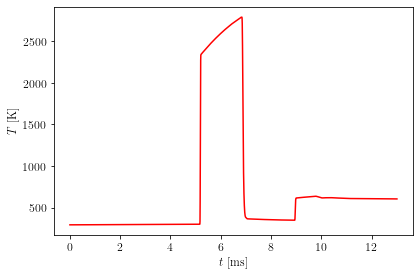

In [2]:
Mixture = {
    'mixtureFile':"O2Argon.xml",
    'X1':"O2:0.02, AR:0.98",
    'X4':"HE:1"
}

Thermal = {
    'p5':0.45*101325,
    'p1':299.9753,
    'T5':5280,
    'g4':0.98*(5/3)+0.02*(7/5),
    'g1':5/3,
    'W4':4,
    'W1':0.02*32+0.98*39.95
}

Sim = {
    'nXFine':1000,
    'tFinal':13e-3,
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': True
}

Geometry = {
    'LDriver':3.3,#9.57,
    'LDriven':10,
    'DDriver':15.24e-2,
    'DDriven':15.24e-2
}
ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)

ssim.XT_Diagram()

In [3]:
ssim.timeXT

array([[ 292.7439674 ,  292.7439674 ,  292.7439674 , ...,  292.7439674 ,
         292.7439674 ,  292.7439674 ],
       [ 292.7439674 ,  292.7439674 ,  292.7439674 , ...,  292.7439674 ,
         292.7439674 ,  292.7439674 ],
       [ 292.7439674 ,  292.7439674 ,  292.7439674 , ...,  292.7439674 ,
         292.7439674 ,  292.7439674 ],
       ...,
       [ 225.86708199,  224.52570459,  223.85101764, ..., 4296.8821491 ,
        4347.5890786 , 4404.18388369],
       [ 225.81821434,  224.4778452 ,  223.80371477, ..., 4295.85978097,
        4346.50536815, 4403.03451664],
       [ 225.81192051,  224.47167866,  223.79762257, ..., 4295.72789987,
        4346.36533894, 4402.88662039]])

In [3]:
p = ssim.pNoInsert
T = ssim.TNoInsert
t = ssim.tNoInsert
s = ssim.sNoInsert
u = ssim.uNoInsert
ssim.Tw

492.7439673974286

Text(0, 0.5, 'Mach Number')

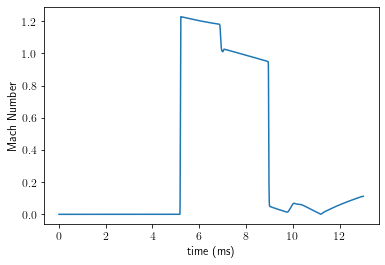

In [9]:
Y = ssim.YNoInsert
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.plot(t/(1e-3), np.abs(u/s))
plt.xlabel('time (ms)')
plt.ylabel('Mach Number')

In [10]:
import numpy as np
#np.savetxt('T_bondChem.csv', T, delimiter=',')
#np.savetxt('p_bondChem.csv', p, delimiter=',')
#np.savetxt('time_bondChem.csv', t, delimiter=',')
#np.savetxt('Y_bondChem.csv', Y, delimiter=',')

np.savetxt('TMaxtrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMaxtrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')

In [11]:
import cantera as ct

gas = ct.Solution('gri30.xml')

gas.species(1).thermo.h(30000)

835397721.208348